In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/MachineLearning/HW1

/content/drive/MyDrive/Colab Notebooks/MachineLearning/HW1


In [3]:
!pip install kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"narges8k","key":"91aea05d8f9c2ca6c8ddbfd6914bdfb6"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 2.16MB/s]


In [7]:
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
from sklearn.preprocessing import OrdinalEncoder

In [17]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [59]:
df = pd.DataFrame(data)

In [60]:
for i,c in enumerate(data['charges']):
  if c<=10000:
    df.replace(c, '<=10k', inplace = True)
  if c>10000 and c<=20000: 
    df.replace(c, '>10k & <=20k', inplace = True)
  if c>20000 and c<=30000:
    df.replace(c, '>20k & <=30k', inplace = True)
  if c>30000 and c<=40000:
    df.replace(c, '>30k & <=40k', inplace = True)
  if c>40000:
    df.replace(c, '>40k', inplace = True)
  # if c>50000 and c<=60000:
  #   df.replace(c, '>50k & <=60k', inplace = True)

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,>10k & <=20k
1,18,male,33.770,1,no,southeast,<=10k
2,28,male,33.000,3,no,southeast,<=10k
3,33,male,22.705,0,no,northwest,>20k & <=30k
4,32,male,28.880,0,no,northwest,<=10k


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

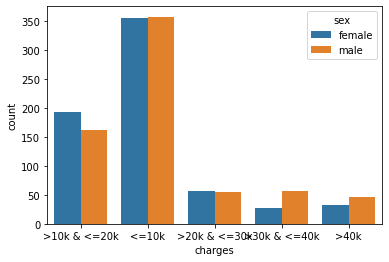

In [66]:
sns.countplot(x='charges', hue='sex', data=df)
from google.colab import files
plt.savefig("sex.png")
files.download("sex.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

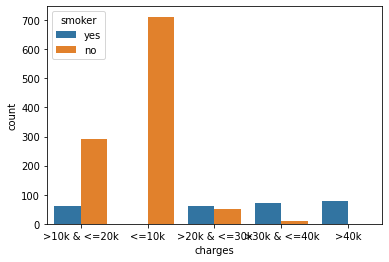

In [67]:
sns.countplot(x='charges', hue='smoker', data=df)
from google.colab import files
plt.savefig("smoker.png")
files.download("smoker.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

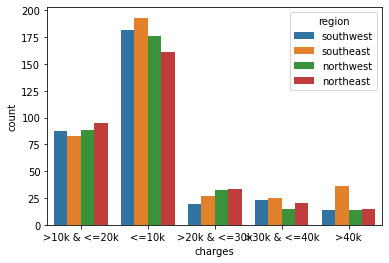

In [68]:
sns.countplot(x='charges', hue='region', data=df)
from google.colab import files
plt.savefig("region.png")
files.download("region.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

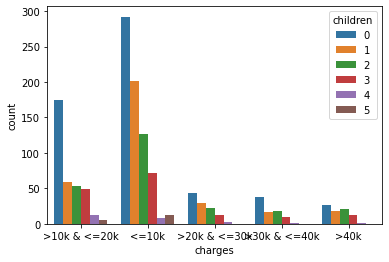

In [70]:
sns.countplot(x='charges', hue='children', data=df)
from google.colab import files
plt.savefig("children.png")
files.download("children.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

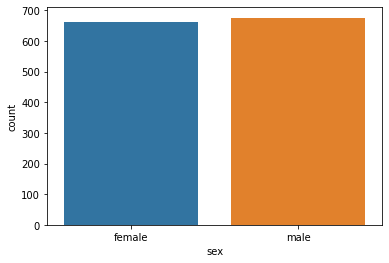

In [72]:
sns.countplot(x='sex', data=df)
from google.colab import files
plt.savefig("sex_dist.png")
files.download("sex_dist.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

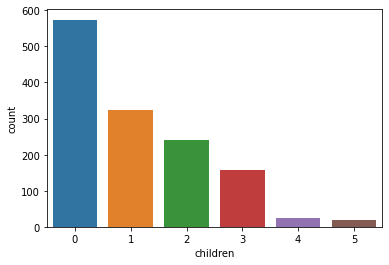

In [73]:
sns.countplot(x='children', data=df)
from google.colab import files
plt.savefig("children_dist.png")
files.download("children_dist.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

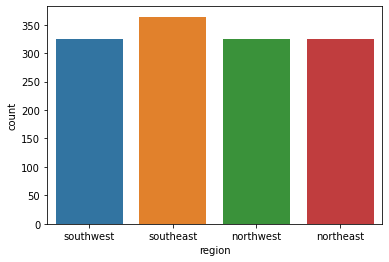

In [74]:
sns.countplot(x='region', data=df)
from google.colab import files
plt.savefig("region_dist.png")
files.download("region_dist.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

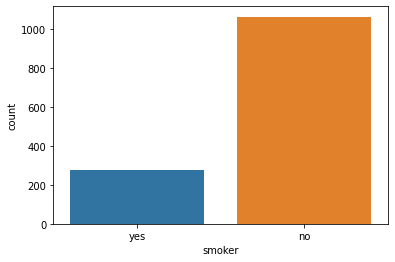

In [75]:
sns.countplot(x='smoker', data=df)
from google.colab import files
plt.savefig("smoker_dist.png")
files.download("smoker_dist.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

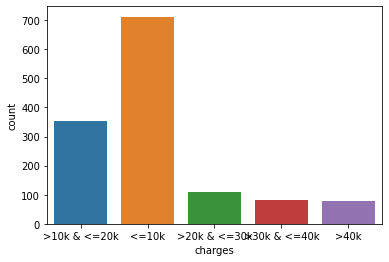

In [76]:
sns.countplot(x='charges', data=df)
from google.colab import files
plt.savefig("charges_dist.png")
files.download("charges_dist.png") 

In [77]:
selected_cols = ['sex', 'smoker', 'region']
ord_enc = OrdinalEncoder ()
df[selected_cols]=ord_enc.fit_transform(df[selected_cols])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,>10k & <=20k
1,18,1.0,33.770,1,0.0,2.0,<=10k
2,28,1.0,33.000,3,0.0,2.0,<=10k
3,33,1.0,22.705,0,0.0,1.0,>20k & <=30k
4,32,1.0,28.880,0,0.0,1.0,<=10k
